In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
D = 3
N = 1e8
true_nlist = [1.5, 2, 4, 8, 16]
#true_nlist = list(range(2, 21))
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
# wrong_nlist = [round((tnn-2*m)/(1-m),4) for tnn in true_nlist]
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
sclist = [0.1, 0.5, 1.0]
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty0'
randix = 0

succeed nsc-setisaturday-numempty0/D=3_n=3.5_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty0/D=3_n=8.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty0/D=3_n=17.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty0/D=3_n=35.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty0/D=3_n=71.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty0/D=3_n=3.5_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=8.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=17.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=35.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=71.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=3.5_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+00_r=0


<ipython-input-86-ffb8f9562891>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


succeed nsc-setisaturday-numempty0/D=3_n=8.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=17.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=35.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+00_r=0
succeed nsc-setisaturday-numempty0/D=3_n=71.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+00_r=0


<Figure size 432x288 with 0 Axes>

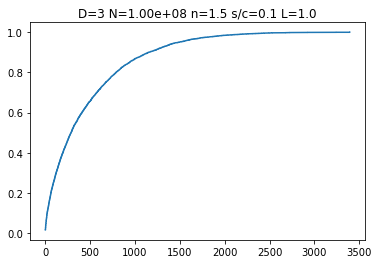

<Figure size 432x288 with 0 Axes>

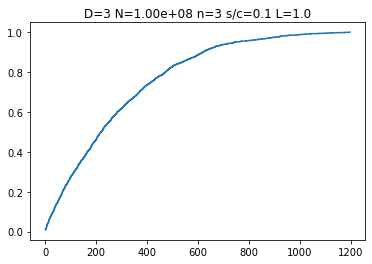

<Figure size 432x288 with 0 Axes>

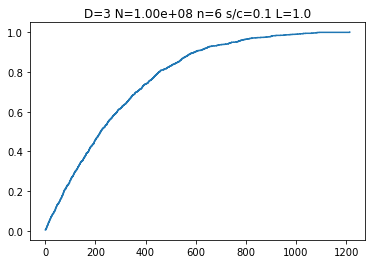

<Figure size 432x288 with 0 Axes>

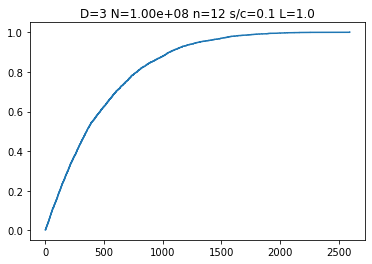

<Figure size 432x288 with 0 Axes>

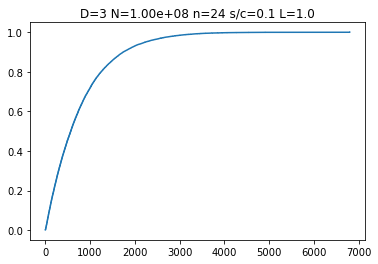

<Figure size 432x288 with 0 Axes>

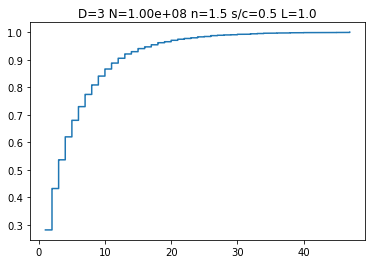

<Figure size 432x288 with 0 Axes>

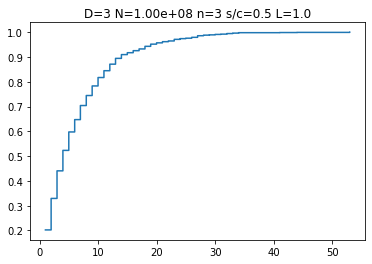

<Figure size 432x288 with 0 Axes>

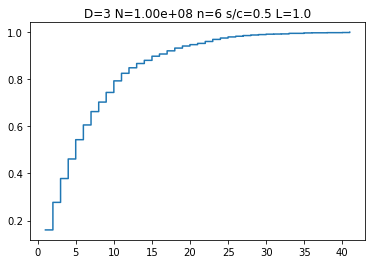

<Figure size 432x288 with 0 Axes>

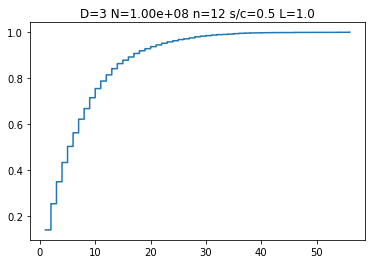

<Figure size 432x288 with 0 Axes>

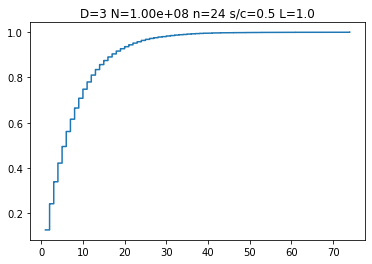

<Figure size 432x288 with 0 Axes>

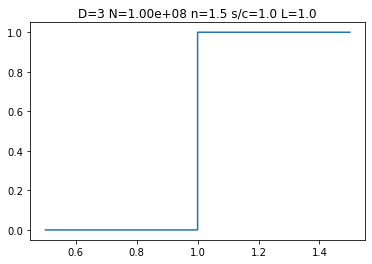

<Figure size 432x288 with 0 Axes>

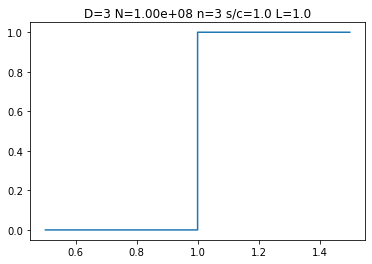

<Figure size 432x288 with 0 Axes>

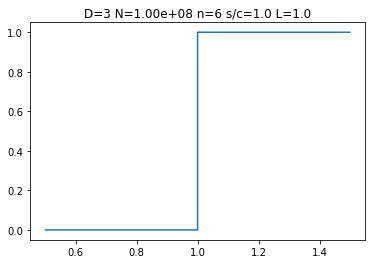

<Figure size 432x288 with 0 Axes>

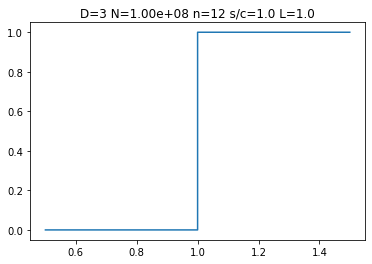

<Figure size 432x288 with 0 Axes>

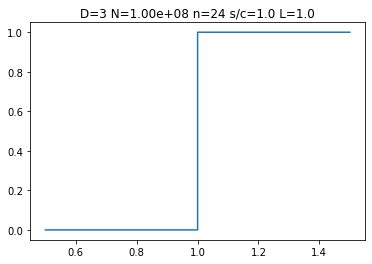

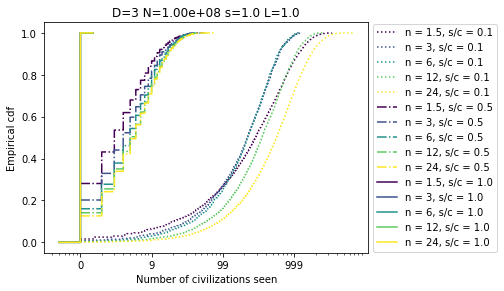

In [86]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = [':', '-.', '-']
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        fout = (
            f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
            f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
        )
        try:
            res = pd.read_csv(fout+'.csv')
            print("succeed " + fout)
        except:
            try:
                fout = (
                    f"nsc-friday-numempty0/D={D}_n={float(n)}_N={N:.2e}_"
                    f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
                )
                res = pd.read_csv(fout+'.csv')
                print("numempty0 succeed " + fout)
            except:
                assert(0)
                print("fail " + fout)
        fig = plt.figure()
        (counts, bins, patches) = plt.hist(
            res.NumberSeen+1, cumulative=True, histtype='step', density=True, bins=res.shape[0])
        fig.clf()
        plt.figure()
        plt.step(bins[0:-1], counts, where='post')
        plt.title(f'D={D} N={N:.2e} n={true_n} s/c={s/c:.1f} L={L:.1f}')
        plot_data[(true_n, sc)] = (bins[0:-1], counts)
fig = plt.figure(figsize=(9,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
ax.set_position([0.1,0.1,0.5,0.8])
plt.gca().set_ylabel('Empirical cdf')
plt.gca().set_xlabel('Number of civilizations seen');
plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
plt.gca().set_xticks([1, 10, 100, 1000]);
plt.gca().set_xticklabels(['0', '9', '99', '999']);
#plt.gca().set_xlim(-1, 1000)
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
fig.savefig('figures-friday/plotF.png', dpi=200);

In [14]:
nlist

[0.5, 2.0, 8.0, 20.0, 44.0]

In [38]:
res

,X,Y,Z,OriginTime,MinArrival,MinSee,NumberSeen,MaxAngle,PctEmpty
0,0.601353,0.189690,0.262906,0.690514,0.867873,0.762128,0,0.00000,0
1,0.591919,0.995085,0.297102,0.699029,0.888326,0.759290,0,0.00000,0
2,0.164713,0.294026,0.308457,0.702313,0.871548,0.773240,0,0.00000,0
3,0.592407,0.432260,0.492382,0.715639,0.839099,0.765834,0,0.00000,0
4,0.083967,0.579141,0.438843,0.715682,0.885097,0.798600,0,0.00000,0
...,...,...,...,...,...,...,...,...,...
6281,0.413877,0.288897,0.125664,0.885756,0.886502,0.839806,38,1.24229,0
6282,0.417235,0.898418,0.128335,0.886262,0.888408,0.847760,60,1.12017,0
6283,0.260185,0.522185,0.635900,0.887263,0.889455,0.858850,53,1.15836,0
6284,0.144792,0.264618,0.622009,0.888058,0.891805,0.850860,49,1.16815,0
